In: (0, 0, 0, 0, 1, 0, 1, 0, 1, 0)

Out: 3

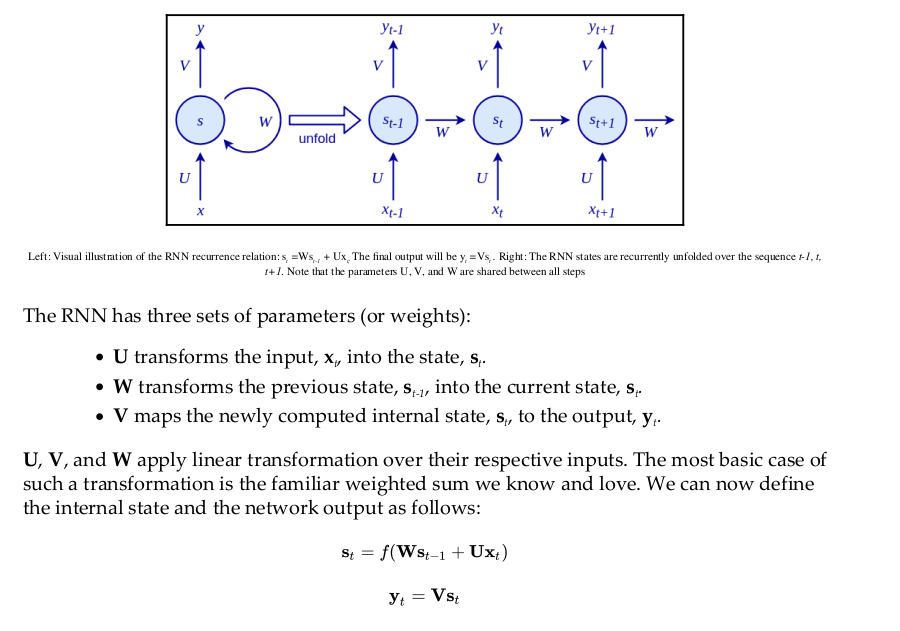

In [22]:
# creat data set
import numpy as np
#The first dimension represents the mini-batch
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])
# x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
# 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
# y = np.array([12])

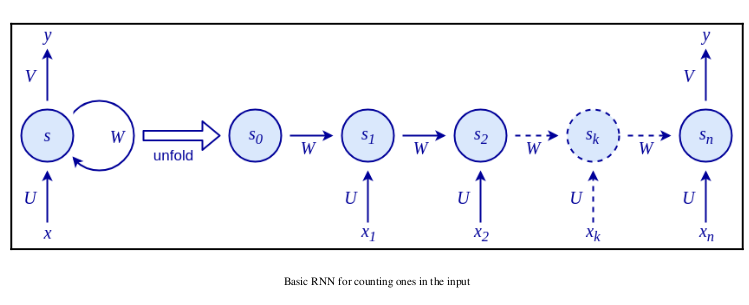

In [23]:
#The states, s_t , and the weights, W and U, are single scalar values
#Note that this is a linear model since we don't apply a non-linear function in this formula
def step(s, x, U, W):
  return x * U + s * W

# **Back Propagation Through Time**

The main difference between regular backpropagation and backpropagation through time is that the recurrent network is unfolded through time for a certain number of time steps. Once the unfolding is complete, we end up with a model that is quite similar to a regular multi-layer feedforward network, that is, one hidden layer of that network represents one step through time. The only differences are that each layer has multiple inputs: the previous state, *s_t-1* , and the current input, *x_t* . The parameters U and W are shared between all of the hidden layers.

The forward pass unwraps the RNN along the sequence and builds a stack of states for each step. In the following code block, we can see an implementation of the forward pass, which returns the activation, s, for each recurrent step and each sample in the batch:

In [24]:
def forward(x, U, W):
  # Number of samples in the mini-batch
  number_of_samples = len(x)
  # Length of each sample
  sequence_length = len(x[0])
  # Initialize the state activation for each sample along the sequence
  s = np.zeros((number_of_samples, sequence_length + 1))
  # Update the states over the sequence
  for t in range(0, sequence_length):
    s[:, t + 1] = step(s[:, t], x[:, t], U, W)
  return s

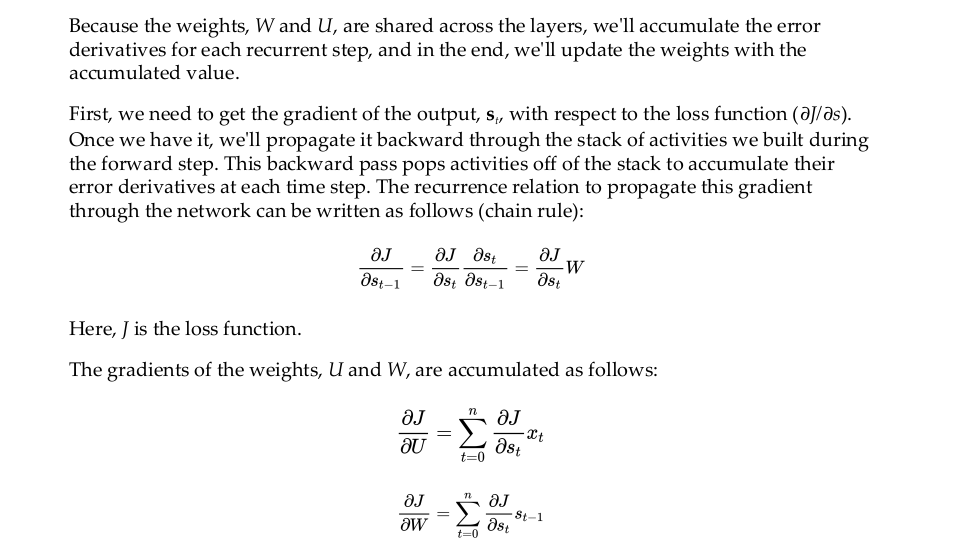

In [25]:
#The gradients for U and W are accumulated in gU and gW , respectively:
def backward(x, s, y, W):
  sequence_length = len(x[0])
  # The network output is just the last activation of sequence
  s_t = s[:, -1]
  # Compute the gradient of the output w.r.t. MSE loss function at final state
  gS = 2 * (s_t - y)
  # Set the gradient accumulations to 0
  gU, gW = 0, 0
  # Accumulate gradients backwards
  for k in range(sequence_length, 0, -1):
    # Compute the parameter gradients and accumulate the results
    gU += np.sum(gS * x[:, k - 1])
    gW += np.sum(gS * s[:, k - 1])
    # Compute the gradient at the output of the previous layer
    gS = gS * W
  return gU, gW

In [26]:
def train(x, y, epochs, learning_rate=0.0005):
  # Set initial parameters
  weights = (-2, 0) # (U, W)
  # Accumulate the losses and their respective weights
  losses = list()
  gradients_u = list()
  gradients_w = list()
  # Perform iterative gradient descent
  for i in range(epochs):
    # Perform forward and backward pass to get the gradients
    s = forward(x, weights[0], weights[1])
    # Compute the loss
    loss = (y[0] - s[-1, -1]) ** 2
    # Store the loss and weights values for later display
    losses.append(loss)
    gradients = backward(x, s, y, weights[1])
    gradients_u.append(gradients[0])
    gradients_w.append(gradients[1])
    # Update each parameter `p` by p = p - (gradient * learning_rate).
    # `gp` is the gradient of parameter `p`
    weights = tuple((p - gp * learning_rate) for p, gp in zip(weights, gradients))
  print(weights)
  return np.array(losses), np.array(gradients_u), np.array(gradients_w)

In [27]:
#Next, we'll implement the related plot_training function, which displays the loss function and the gradients for each weight over the epochs:
import matplotlib.pyplot as plt
def plot_training(losses, gradients_u, gradients_w):
  # remove nan and inf values
  losses = losses[~np.isnan(losses)][:-1]
  gradients_u = gradients_u[~np.isnan(gradients_u)][:-1]
  gradients_w = gradients_w[~np.isnan(gradients_w)][:-1]
  # plot the weights U and W
  fig, ax1 = plt.subplots(figsize=(5, 3.4))
  ax1.set_ylim(-3, 20)
  ax1.set_xlabel('epochs')
  ax1.plot(gradients_u, label='grad U', color='blue', linestyle=':')
  ax1.plot(gradients_w, label='grad W', color='red', linestyle='--')
  ax1.legend(loc='upper left')
  # instantiate a second axis that shares the same x-axis
  # plot the loss on the second axis
  ax2 = ax1.twinx()
  # uncomment to plot exploding gradients
  ax2.set_ylim(-3, 10)
  ax2.plot(losses, label='Loss', color='green')
  ax2.tick_params(axis='y', labelcolor='green')
  ax2.legend(loc='upper right')
  fig.tight_layout()
  plt.show()


(-2.088692479228279, -0.7529413189879612)


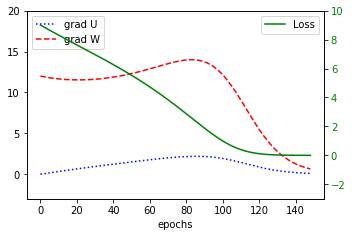

In [28]:
#Finally, we can run this code:
losses, gradients_u, gradients_w = train(x, y, epochs=150)
plot_training(losses, gradients_u, gradients_w)